In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import glob
import matplotlib.pyplot as plt

##### Read training images and bounding box annotations

In [2]:
### Read bounding box annotations - training set
data_dir = "../wider_face/data"
with open(os.path.join(data_dir, "wider_face_split/wider_face_train_bbx_gt.txt"), "r") as file: 
    bbox_anno = [line.rstrip("\n, ") for line in file.readlines()]

In [3]:
### Create a dictionary such that it contains image_name:respective_annotations 
img_indices = []
n_bbxes = []
for i in range(len(bbox_anno)):
    if bbox_anno[i].endswith((".jpg", ".jpeg", ".png")):
        img_indices.append(i)
        n_bbxes.append(int(bbox_anno[i+1]))
dic = {}
for idx,n in list(zip(img_indices, n_bbxes)):
    img_name = bbox_anno[idx]
    res_annot = bbox_anno[idx+2 : idx+2+n]
    ### Remove blur, expression, illumination, invalid, occlusion and pose details. Keep x1, y1, w and h.
    res_annot = [" ".join(annot.split()[:4]) for annot in res_annot]
    dic[img_name] = res_annot

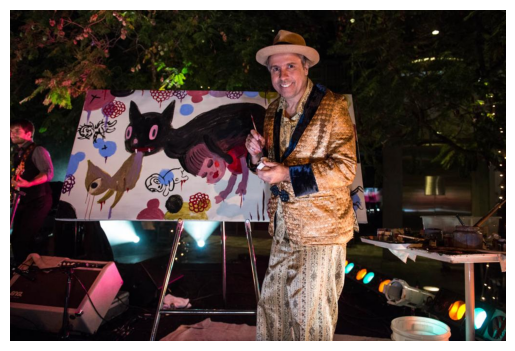

In [158]:
### Display random images from the training set
rand_n = np.random.randint(len(dic))
rand_img = list(dic.items())[rand_n]
bgr = cv2.imread(os.path.join(data_dir, "WIDER_train/images", rand_img[0]))
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis("off")
plt.show()

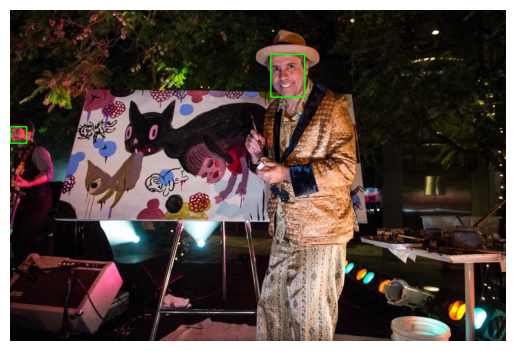

In [159]:
### Display bounding boxes
for annot in rand_img[1]:
    x, y, w, h = [int(pt) for pt in annot.split()]
    cv2.rectangle(rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(rgb)
plt.axis("off")
plt.show()

##### Preprocess training images

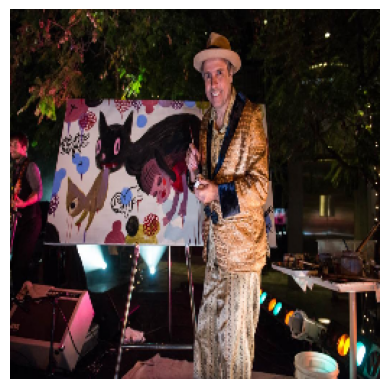

In [170]:
### Reshape images
OUTPUT_SHAPE = (256, 256)
bgr_ = cv2.imread(os.path.join(data_dir, "WIDER_train/images", rand_img[0]))
rgb_ = cv2.cvtColor(bgr_, cv2.COLOR_BGR2RGB)
resized_image = cv2.resize(rgb_, OUTPUT_SHAPE)
plt.imshow(resized_image)
plt.axis("off")
plt.show()

In [172]:
### Rescale bounding box annotations
def scale_bbx(bbxs, org_img_shape, out_img_shape):
    org_height, org_width = org_img_shape
    new_height, new_width = out_img_shape
    scale_x = new_width / org_width
    scale_y = new_height / org_height
    scaled_bbxs = []
    for bb in bbxs:
        x, y, w, h = [int(pt) for pt in bb.split()]
        scaled_bb = list(map(round, [scale_x * x, scale_y * y, scale_x * w, scale_y * h]))
        scaled_bbxs.append(scaled_bb)
    return scaled_bbxs

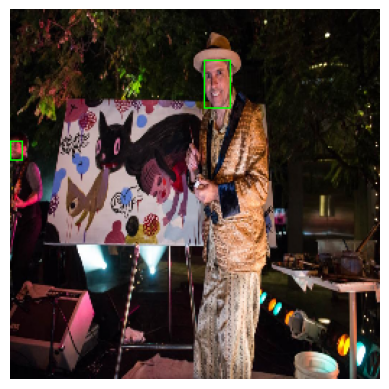

In [184]:
### Display rescaled bounding boxes
scaled_bb = scale_bbx(rand_img[1], rgb.shape[:2], OUTPUT_SHAPE)
for bb in scaled_bb:
    x, y, w, h = bb
    cv2.rectangle(resized_image, (x, y), (x+w, y+h), (0, 255, 0), 1)
plt.imshow(resized_image, )
plt.axis("off")
plt.show()